# Mandatory Assignment 01
## Natural Language Processing and Text Analytics (KAN-CDSCO1002U)

**Alex & Pontus**

---
## Part 1: Mandatory Question

The following two sentences are ambiguous -- that is, they each have two (or more) different readings. For each sentence, explain the different readings:

**1. The girl attacked the boy with the book.**

reading 1: the girl attacked the boy that had a book

reading 2: the girl attacked the boy using a book as a weapon

**2. We decided to leave on Saturday.**

reading 1: they are leaving on a saturday

reading 2: they took a decision on a saturday




Are the following sentences ambiguous? If the sentence is ambiguous, explain the different readings. If not, explain why not.

**3. I saw a man with a briefcase.**

ambiguous, either the man has the briefcase or the viewer has a briefcase

**4. I saw the planet with a telescope.**

ambiguous, either a planet was witnessed through a telescope, or a planet with a telescope was witnessed


the reason why 2, 3 and 4 are ambiguous are because you do not know which noun the preposition is connected to

Try the above sentences (3 and 4) in this parse tree generator: https://huggingface.co/spaces/nanom/syntactic_tree

Compare the dependency structures for both of them. Explain the differences in the link to the preposition "with" in 3 vs. 4.

I saw a man with a briefcase.

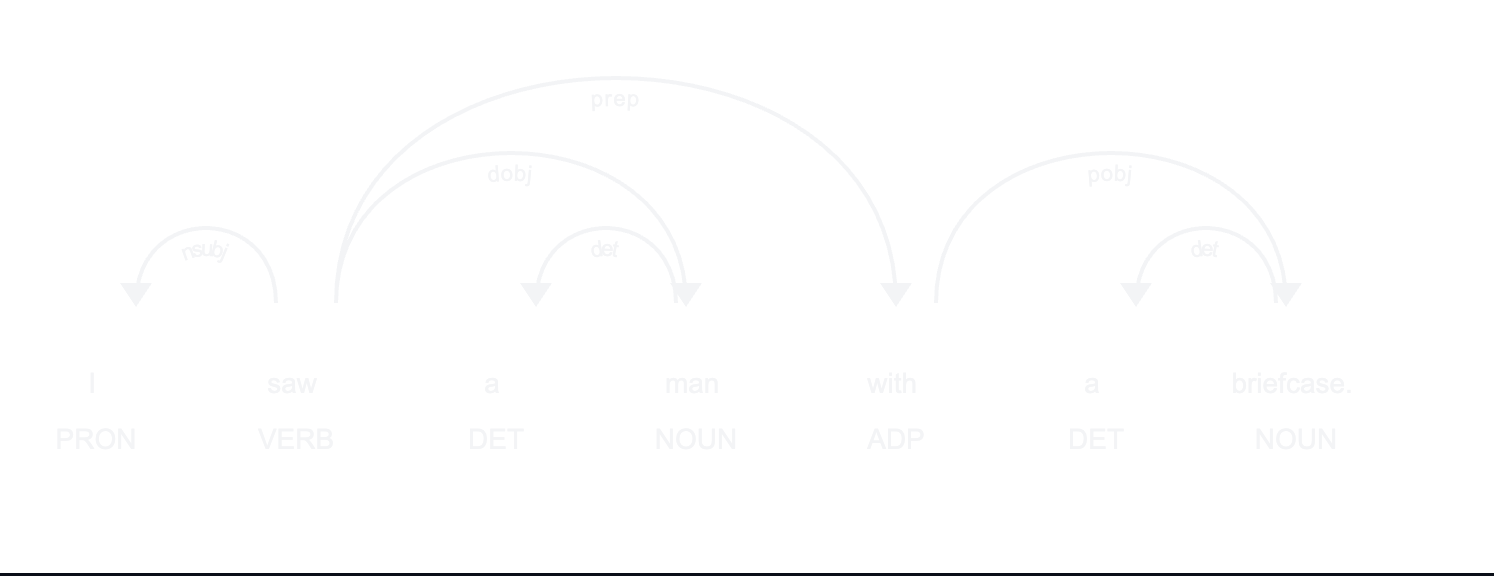

saw: (Root) (VBD)
├── I: 1 (PRP)
├── man: 1 (NN)
│   └── a: 2 (DT)
├── with: 1 (IN)
│   └── briefcase: 2 (NN)
│       └── a: 3 (DT)
└── .: 1 (.)

I saw the planet with a telescope.

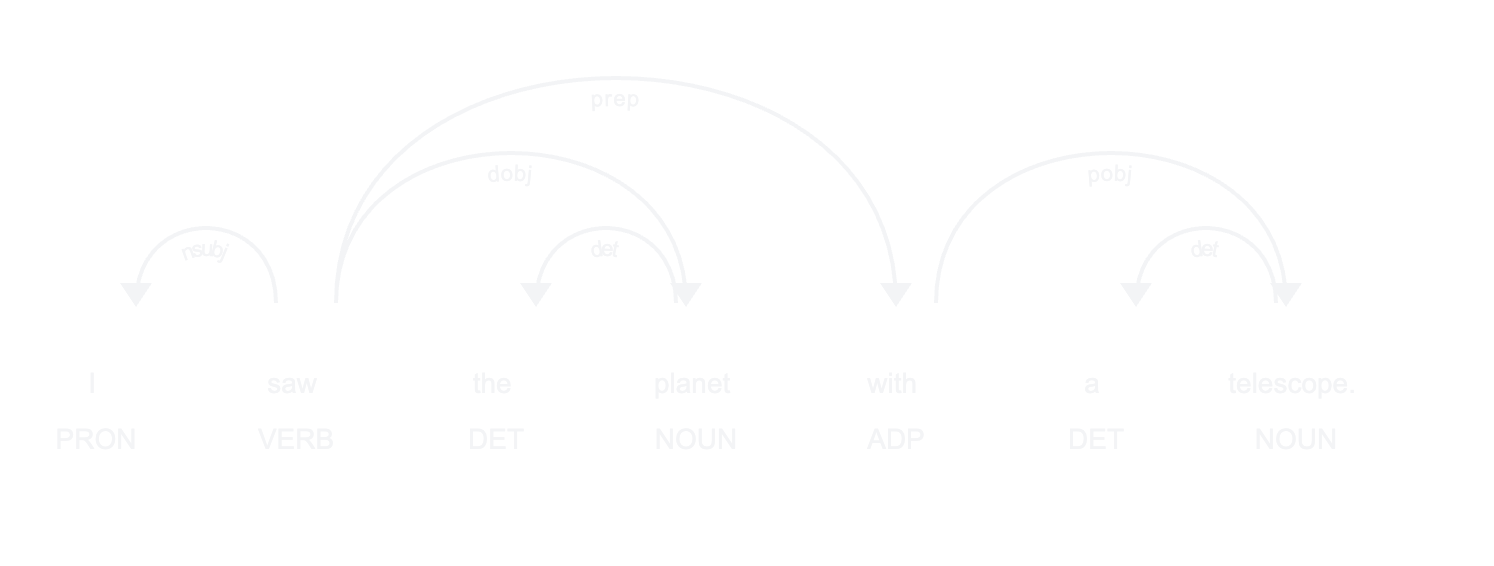

saw: (Root) (VBD)
├── I: 1 (PRP)
├── planet: 1 (NN)
│   └── the: 2 (DT)
├── with: 1 (IN)
│   └── telescope: 2 (NN)
│       └── a: 3 (DT)
└── .: 1 (.)


The ambiguity in all three sentences comes from prepositional phrase attachment: the preposition ("with" in sentences 3 and 4) can grammatically attach to more than one element in the sentence, and the syntax alone does not tell you which one is intended.


---
## Part 2: Select any one question to answer

*(Choose either Option A or Option B below)*

### Option A: Linguistic Analysis of a Text Corpus Using spaCy

There is an uploaded text corpus named `sample.xlsx`. Conduct a linguistic analysis using Part-of-Speech (POS) tagging and Named Entity Recognition (NER) in spaCy library only on the "SOS Tweet/SOS Message" column.

#### Task 1: Prepare the Corpus
Pre-process the corpus data by removing stopwords, removing extra spaces, converting all text to lowercase, or apply any other text normalization techniques that you think is relevant.

In [6]:
# Task 1: Prepare the Corpus
import pandas as pd
import spacy
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the dataset (headers are in row 8)
df = pd.read_excel("Data/sample.xlsx", header=8)

# Extract the SOS Tweet / SOS Message column
sos_col = "SOS Tweet / SOS Message"
messages = df[sos_col].dropna().astype(str).tolist()

print(f"Total messages: {len(messages)}")
print(f"Sample message:\n{messages[0][:200]}...")

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # Remove mentions like [Redacted Mention] and [Redacted Address]
    text = re.sub(r"\[redacted \w+\]", "", text)
    # Remove special characters and extra spaces, keep letters and basic punctuation
    text = re.sub(r"[^a-z0-9\s.,!?'-]", " ", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply preprocessing
df_clean = df.copy()
df_clean["cleaned_text"] = df[sos_col].dropna().astype(str).apply(preprocess)

# Remove stopwords using spaCy
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct and token.text.strip()])

df_clean["processed_text"] = df_clean["cleaned_text"].dropna().apply(remove_stopwords)

# Show results
print("\nPreprocessing complete.")
print(f"\nBefore: {messages[0][:150]}...")
print(f"\nAfter:  {df_clean['processed_text'].iloc[0][:150]}...")

Total messages: 100
Sample message:
my relative B************n who is from bagmara jharkhand is tested positive for corona and is admitted in recovery nourshing home bardmaan West Bengal.He is not getting sufficient treatment and his he...

Preprocessing complete.

Before: my relative B************n who is from bagmara jharkhand is tested positive for corona and is admitted in recovery nourshing home bardmaan West Bengal...

After:  relative b n bagmara jharkhand tested positive corona admitted recovery nourshing home bardmaan west bengal.he getting sufficient treatment health get...


#### Task 2: POS Tagging and NER
Apply POS tagging to the entire corpus to analyze the distribution of different parts of speech. Use NER to identify and categorize named entities within the text such as name, date, locations etc.

In [ ]:
# Task 2: POS Tagging and NER


#### Task 3: Analysis
Determine the most common POS tags and discuss what this reveals about the structure of the text.

In [ ]:
# Task 3: Analysis


#### Task 4: Short Report (1-2 pages)
Summarize your findings in a brief report, including any interesting patterns or insights gained from the POS and NER analysis.

*Your report here*